# Linear and Polynomial Regression  

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluting your notebook!!! Do not change data files or their names



Student name: Andrea Nicolai
ID Number: 1233407

## 1) Linear Regression on the Boston House Price dataset



## Dataset description

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price). <br>
The variable names are as follows:
1. CRIM: per capita crime rate by town. <br>
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. <br>
3. INDUS: proportion of nonretail business acres per town. <br>
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). <br>
5. NOX: nitric oxides concentration (parts per 10 million). <br>
6. RM: average number of rooms per dwelling. <br>
7. AGE: proportion of owner-occupied units built prior to 1940. <br>
8. DIS: weighted distances to five Boston employment centers. <br>
9. RAD: index of accessibility to radial highways. <br>
10. TAX: full-value property-tax rate per $\$$10,000. <br>
11. PTRATIO: pupil-teacher ratio by town. <br>
12. B: 1000*(Bk – 0.63)\$^2\$ where Bk is the proportion of blacks by town. <br>
13. LSTAT: \% lower status of the population. <br>
14. MEDV: Median value of owner-occupied homes in $\$$1000s. <br>

In [1]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

## Import Data
Load the data from a .csv file

**TO DO:** insert a seed number (e.g., your ID number (matricola))


In [2]:
# Load the data
IDnumber = 123 #PLACE A RANDOM SEED (your ID, but try also to change and see what happens)
np.random.seed(IDnumber)

filename = "data/house.csv"

Data = np.genfromtxt(filename, delimiter=';',skip_header=1)


# A quick overview of data

To inspect the data you can use the method describe()

In [3]:
dataDescription = stats.describe(Data)
print(dataDescription)

print ("Shape of data array: " + str(Data.shape))


#for more interesting visualization: use Panda!

DescribeResult(nobs=500, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00, 5.0000e+01]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  , 500.    ])), mean=array([3.65578576e+00, 1.15000000e+01, 1.11317400e+01, 7.00000000e-02,
       5.54451400e-01, 6.28297000e+00, 6.84246000e+01, 3.81193180e+00,
       9.64200000e+00, 4.09624000e+02, 1.84286000e+01, 3.56208040e+02,
       1.26987400e+01, 2.25680000e+02]), variance=array([7.47252195e+01, 5.48905812e+02, 4.76198228e+01, 6.52304609e-02,
       1.35838329e-02, 4.97618330e-01, 7.99314163e+02, 4.46304043e+00,
       7.59617595e+01, 2.85605197e+04, 4.67663531e+00, 8.41657137e+03,
       5.13361942e+01, 8.52982926e+03]), skewness=array([ 5.17851447,  2.19924065,  0.29469001,  3.37060575,  0.72944382,
        0

In [4]:
import pandas as pd

data = pd.read_csv(filename, delimiter = ";")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,240
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,216
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,347
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,334
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,362
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,287
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,229
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,271
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,165
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,189


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.655786,11.500000,11.131740,0.070000,0.554451,6.282970,68.424600,3.811932,9.642000,409.624000,18.428600,356.208040,12.698740,225.680000
std,8.644375,23.428739,6.900712,0.255403,0.116550,0.705421,28.272145,2.112591,8.715604,168.998579,2.162553,91.741874,7.164928,92.357075
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,50.000000
25%,0.082598,0.000000,5.130000,0.000000,0.448750,5.883000,44.225000,2.087875,4.000000,281.000000,17.225000,375.085000,6.990000,170.750000
50%,0.266005,0.000000,9.125000,0.000000,0.538000,6.208500,77.150000,3.267450,5.000000,330.000000,19.000000,391.305000,11.430000,212.000000
75%,3.694070,12.500000,18.100000,0.000000,0.624000,6.620500,94.100000,5.214600,24.000000,666.000000,20.200000,396.157500,17.092500,250.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,500.000000


# Split data in training, validation and test sets



Given $m$ total data, denote with $m_{tv}$ the part used for training and validation. Keep $m_t$ data as training data, $m_{val}:=m_{tv}-m_t$ as validation data and $m_{test}:=m - m_{val} - m_t = m-m_{tv}$. For instance one can take $m_t=m/2$ of the data as training, $m_{val}=m/4$  validation and $m_{test}=m/4$ as testing. Let us define: 

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{val}$ the validation data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

VALIDATION DATA: When different model classes are present (e.g. of different complexity such as linear regression which uses a different number $d_j$ of regressors $x_1$,...$x_{d_j}$), one has to choose which one is the "best" complexity. 
Let ${\cal H}_{d_j}$ be the space of models as a function of the complexity $d_j$ and let 
$$
\hat h_{d_j} = {\rm arg\; min}_{h \in {\cal H}_{d_j}} \, L_S(h)
$$

One can estimate the generalization error for model $\hat h_{d_j}$ as follows:
$$
L_{{\cal D}}(\hat h_{d_j}) \simeq \frac{1}{m_{val}} \sum_{ z_i \in S_{val}} \ell(\hat h_{d_j},z_i)
$$
and then choose the complexity which achieves the best estimate of the generalization error
$$
\hat d_j: = {\rm arg\; min}_{d_j} \,\frac{1}{m_{val}} \sum_{ z_i \in S_{val}} \ell(\hat h_{d_j},z_i)
$$

TESTING DATA: Last, the test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training, validation and test sets (50%-25%-25%)

In [6]:
#get number of total samples
num_total_samples = Data.shape[0]

print ("Total number of samples: ", num_total_samples)

#size of each chunk of data (1/4 each): 2 of them for training, 1 for validation, 1 for testing
size_chunk = int(num_total_samples*0.25)

print ("Size of each chunk of data: ", size_chunk)

#shuffle the data
np.random.shuffle(Data)

#training data 
X_training = Data[:2*size_chunk,:13]
Y_training = np.reshape(Data[:2*size_chunk,13], (2*size_chunk,1))
print ("Training input data size: ", X_training.shape)
print ("Training output data size: ", Y_training.shape)

#validation data, to be used to choose among different models
X_validation = Data[2*size_chunk:3*size_chunk ,:13]
Y_validation = np.reshape(Data[2*size_chunk:3*size_chunk ,13], (size_chunk,1))
print ("Validation input data size: ", X_validation.shape)
print ("Validation output data size: ", Y_validation.shape)

#test data, to be used to estimate the true loss of the final model(s)
X_test = Data[3*size_chunk:4*size_chunk ,:13]
Y_test = np.reshape(Data[3*size_chunk:4*size_chunk ,13], (size_chunk,1))
print ("Test input data size: ", X_test.shape)
print ("Test output data size: ", Y_test.shape)

Total number of samples:  500
Size of each chunk of data:  125
Training input data size:  (250, 13)
Training output data size:  (250, 1)
Validation input data size:  (125, 13)
Validation output data size:  (125, 1)
Test input data size:  (125, 13)
Test output data size:  (125, 1)


# Data Normalization

It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to $1$. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients. 

In [7]:
#scale the data

# standardize the input matrix
from sklearn import preprocessing

# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

#then used on all the 3 sets
X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_validation = scaler.transform(X_validation) # use the same transformation on validation data
print ("Mean of the validation input data:", X_validation.mean(axis=0))
print ("Std of the validation input data:", X_validation.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))


Mean of the training input data: [ 3.88578059e-17  9.50350909e-17  3.63886699e-15  1.73194792e-17
 -3.91686683e-16 -3.52295970e-15 -3.77031739e-16 -1.20659038e-15
 -4.08562073e-17 -4.14113188e-17  1.92539318e-14  2.26108021e-15
  5.70210545e-16]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the validation input data: [-0.09830629  0.01850181 -0.0493588  -0.2        -0.13662518 -0.01868977
 -0.10364737  0.18429179 -0.05109708 -0.07521292  0.05071373  0.13044223
  0.00931844]
Std of the validation input data: [0.7614265  0.95847903 0.97528729 0.65319726 0.96574881 0.89960603
 0.9679856  1.03259209 0.95588258 0.96237998 0.95246784 0.78502767
 0.97046611]
Mean of the test input data: [-0.0390714  -0.01646491 -0.12996318 -0.2        -0.1226658   0.03750177
 -0.13661054  0.1477534  -0.0908895  -0.12529223  0.14031396  0.1545796
 -0.07547337]
Std of the test input data: [1.30717507 1.01320434 0.9930114  0.65319726 0.96623159 1.01062925
 1.04637463 1.13555182

# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients implementing the least square algorithm as done in the introductory lab **and** using np.linalg.lstsq from scikitlear 
 

In [8]:
#compute linear regression coefficients for training data

#add a 1 at the beginning of each sample for training, validation, and testing (use homogeneous coordinates)

X_training_lsq = np.zeros((2*size_chunk,14))
X_validation_lsq = np.zeros((size_chunk,14))
X_test_lsq = np.zeros((size_chunk,14))

# we use homogeneous coordinates (add 1 for first component of vector x)
X_training_lsq[:,0] = 1
X_validation_lsq[:,0] = 1
X_test_lsq[:,0] = 1

X_training_lsq[:,1:] = X_training
X_validation_lsq[:,1:] = X_validation
X_test_lsq[:,1:] = X_test

# Compute the least-squares solution using the same approach of LAB0
A = np.zeros((14,14))
b = np.zeros((14,1))

for i in range(0,2*size_chunk):
    e = X_training_lsq[i,:].reshape(14,1)
    A = A + np.matmul(e,np.transpose(e))
    b = b + Y_training[i]*e
    
# Compute the least-squares coefficients by hand
w_hand = np.matmul(np.linalg.inv(A),b)

# Compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr =  np.linalg.lstsq(X_training_lsq, Y_training,rcond=None) # rcond=None avoids warning message

print("LS coefficients by hand:", w_hand)
print("LS coefficients with numpy lstsq:", w_np)

# compute Residual sums of squares by hand
RSStr_hand = np.sum((np.dot(X_training_lsq,w_hand) - Y_training)**2)

print("RSS by hand:",  RSStr_hand)
print("RSS with numpy lstsq: ", RSStr_np)

m_training = len(X_training_lsq)
print("Empirical risk by hand:", RSStr_hand/m_training)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training)

LS coefficients by hand: [[227.512     ]
 [ -8.15597084]
 [ 16.20943703]
 [ -1.12947556]
 [ 12.11725081]
 [-24.57429474]
 [ 12.52193399]
 [  8.44442974]
 [-32.37473693]
 [ 27.30133619]
 [-15.84093204]
 [-25.63620743]
 [  9.34469095]
 [-50.10286128]]
LS coefficients with numpy lstsq: [[227.512     ]
 [ -8.15597084]
 [ 16.20943703]
 [ -1.12947556]
 [ 12.11725081]
 [-24.57429474]
 [ 12.52193399]
 [  8.44442974]
 [-32.37473693]
 [ 27.30133619]
 [-15.84093204]
 [-25.63620743]
 [  9.34469095]
 [-50.10286128]]
RSS by hand: 569509.308851588
RSS with numpy lstsq:  [569509.30885159]
Empirical risk by hand: 2278.037235406352
Empirical risk with numpy lstsq: [2278.03723541]


## Data prediction 

Compute the output predictions on both training and validation set and compute the Residual Sum of Sqaures (RSS) defined above, the Emprical Loss and the quantity $1-R^2$ where
$$
R^2 = \frac{\sum_{z_i \in S_t} (\hat y_i - \bar y)^2}{\sum_{z_i \in S_t} (y_i - \bar y)^2} \quad \quad \bar y = \frac{1}{m_t} \sum_{z_i \in S_t} y_i
$$
is the so-called "Coefficient of determination" (COD)

**TO DO**: Compute these quantities on  training, validation and test sets.


In [9]:
#compute predictions on training and validation

#prediction_training 
prediction_training = np.array(np.dot(X_training_lsq,w_hand))
prediction_validation = np.array(np.dot(X_validation_lsq,w_hand))
prediction_test = np.array(np.dot(X_test_lsq,w_hand))

#what about the loss for points in the validation and test data?
RSS_validation = np.sum((prediction_validation - Y_validation)**2)
RSS_test = np.sum((prediction_test - Y_test)**2)

m_validation = len(X_validation_lsq)
m_test = len(X_test_lsq)
print("RSS on validation data:",  RSS_validation)
print("Loss estimated from validation data:", RSS_validation/m_validation)
print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

#another measure of how good our linear fit is given by the following (that is 1 - R^2)
measure_training = 1. - np.sum( ( prediction_training - Y_training )**2)/np.sum((Y_training - np.mean(Y_training))**2)
measure_validation = 1. - np.sum( ( prediction_validation - Y_validation )**2)/np.sum((Y_validation - np.mean(Y_validation))**2)
measure_test = 1. - np.sum( ( prediction_test - Y_test )**2) /(np.sum((Y_test - np.mean(Y_test))**2))

#another measure of how good our linear fit is given by the following (R^2)
measure_training1 = np.sum( ( prediction_training - np.mean(Y_training) )**2)/np.sum((Y_training - np.mean(Y_training))**2)
measure_validation1 =  np.sum( ( prediction_validation - np.mean(Y_validation) )**2)/np.sum((Y_validation - np.mean(Y_validation))**2)
measure_test1 = np.sum( ( prediction_test - np.mean(Y_test) )**2) /(np.sum((Y_test - np.mean(Y_test))**2))

print("\nMeasure on Training Data using more general definition (1-R^2):", measure_training)
print("Measure on Validation Data using more general definition (1-R^2):", measure_validation)
print("Measure on Test Data  using more general definition (1-R^2):", measure_test)

print("\nMeasure on Training Data (R^2):", measure_training1)
print("Measure on Validation Data(R^2):", measure_validation1)
print("Measure on Test Data(R^2):", measure_test1)

RSS on validation data: 240598.48763248103
Loss estimated from validation data: 1924.7879010598483
RSS on test data: 356114.1006506469
Loss estimated from test data: 2848.912805205175

Measure on Training Data using more general definition (1-R^2): 0.7512536728545955
Measure on Validation Data using more general definition (1-R^2): 0.7394078981481985
Measure on Test Data  using more general definition (1-R^2): 0.6557083618958908

Measure on Training Data (R^2): 0.7512536728545977
Measure on Validation Data(R^2): 0.8168841827678773
Measure on Test Data(R^2): 0.6147831601110191


**QUESTION 1**: Comment on the results you get and on the difference between the train, validation and test errors.

After we split my whole dataset into Training, Validation and Test sets we see that the ERM and the Loss estimated from validation and test data are of the same order of magnitude, so the fit is quite good. We can notice that also from the measure of the COD (which more general definition is $(1-R^2)$ ) and which the closer it is to $1$, the better the fit is: those measures show us that there could be some linear dependencies of the price of the houses using TAX and other parameters given as variables. It is quite reasonable. We see, as we expected that the COD on Training data is quite larger than the others, because we have trained our algorithm on that set.

By the way, using the other definition given above in this notebook that holds under certain hypotheses, I obtain different results: it could mean that these hypotheses are violated for validation and test datasets. Computations should be good, since using scikit LinRegress method I obtain the same result. Moreover, if these hypotheses hold, then the identity $SS_{res} + SS_{reg} = SS_{tot}$ will hold itself. We see, below, that for training set it is true and it explains also why we can use the formula given above in the notebook in order to compute $R^2$ for the training set since both definitions are equivalent. For the other cases, related to the remaining datasets, this identity does not hold, so we must se the more general definition for the $COD = (1 - R^2)$.

Predicted prices, shown in the plot below, aren't too far from the real points we got from the dataset, except for few ones that are not statistically relevant.

In [20]:
rss = np.sum( ( prediction_training - Y_training )**2)
reg = np.sum( ( prediction_training - np.mean(Y_training) )**2)
tot = np.var(Y_training)*m_training
print((rss + reg), " ?= ",tot)
print("They are equal! So we can use the other definition for the COD")


rss = np.sum( ( prediction_validation - Y_validation)**2)
reg = np.sum( ( prediction_validation - np.mean(Y_validation) )**2)
tot = np.var(Y_validation)*m_validation
print((rss + reg), " ?= ",tot)

rss = np.sum( ( prediction_test - Y_test)**2)
reg = np.sum( ( prediction_test - np.mean(Y_test) )**2)
tot = np.var(Y_test)*m_test
print((rss + reg), " ?= ",tot)

2289518.4639999866  ?=  2289518.464
They are equal! So we can use the other definition for the COD
994808.2182735858  ?=  923276.208
992007.9996825294  ?=  1034338.512


## ... and plot:


### (1) output predictions on training  data

<IPython.core.display.Javascript object>


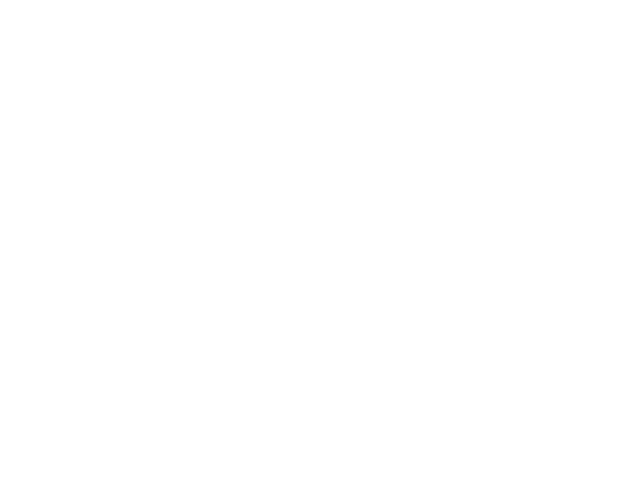

In [11]:
# Plot predictions on Training data 
plt.figure()

#the following is just for nice plotting, not required: it sorts the predictions by value so that they fall on
# a line and it's easier to spot the differences

# NOTICE: This code is suitable for the "standard" solution, check that the variable names 
# and structure are compatible with your implementation

sorting_permutation = sorted(range(len(prediction_training[0:m_training])), key=lambda k: prediction_training[0:m_training][k])
plt.plot(Y_training[sorting_permutation], 'ko', alpha=0.5)
plt.plot(prediction_training[sorting_permutation], 'rx')

plt.xlabel('Input (index of instance)')
plt.ylabel('Predicted Output')
plt.title('Predictions on Training Data')
plt.show()

### (2) output predictions on validation  data

<IPython.core.display.Javascript object>


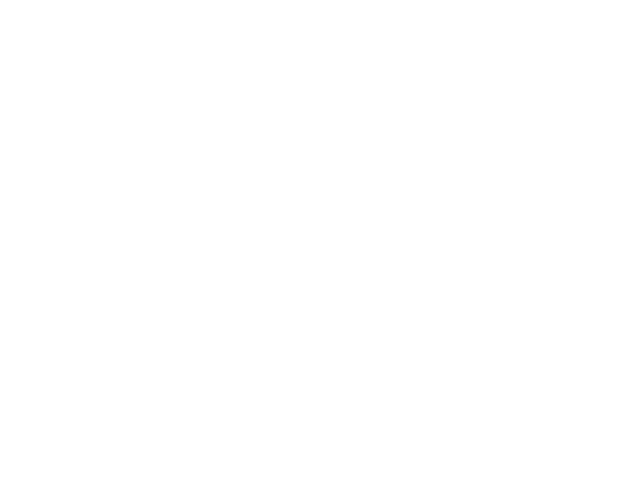

In [12]:
# Plot predictions on validation data 
plt.figure()

#the following is just for nice plotting, not required: it sorts the predictions by value so that they fall on
# a line and it's easier to spot the differences

# NOTICE: This code is suitable for the "standard" solution, check that the variable names 
# and structure are compatible with your implementation

sorting_permutation = sorted(range(len(prediction_validation[0:m_validation])), key=lambda k: prediction_validation[0:m_validation][k])
plt.plot(Y_validation[sorting_permutation], 'ko', alpha=0.5)
plt.plot(prediction_validation[sorting_permutation], 'gx')


plt.xlabel('Input (index of instance)')
plt.ylabel('Predicted Output')
plt.title('Predictions on Validation Data')
plt.show()

## Ordinary Least-Squares using scikit-learn

A fast way to compute the LS estimate is through sklearn.linear_model

In [13]:
from sklearn import linear_model
LinReg = linear_model.LinearRegression()  # build the object LinearRegression
LinReg.fit(X_training, Y_training)  # estimate the LS coefficients
print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)
prediction_training = LinReg.predict(X_training)  # predict output values on training set
prediction_test = LinReg.predict(X_test)  # predict output values on test set

Intercept: [227.512]
Least-Squares Coefficients: [[ -8.15597084  16.20943703  -1.12947556  12.11725081 -24.57429474
   12.52193399   8.44442974 -32.37473693  27.30133619 -15.84093204
  -25.63620743   9.34469095 -50.10286128]]


In [14]:
print("Measure on training data:", 1-LinReg.score(X_training, Y_training))
print("Measure on training data found before:",1 - measure_training)
print("Here I see COD for training set is the same as the one found using scikit-learn.")

Measure on training data: 0.24874632714540446
Measure on training data found before: 0.24874632714540446
Here I see COD for training set is the same as the one found using scikit-learn.


# 2) Polynomial Regression

In this exercise you need to use polynomial regression to estimate the height reached by a ball thrown into air. The motion of the ball is controlled by the motion equation with uniform acceleration (in our case given by the gravity) that is a quadratic model. You need to estimate the initial height of the ball (h), the initial speed at which it was launched (v) and the gravity acceleration (g). The equation of the motion is : $y = h + vt + \frac{1}{2} gt^2$ .
In the motion.csv file you can find the measured height values (subject to noise) and the corresponding time instants.

In [15]:
#import the required packages
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [16]:
# load the data (time and height values) from the motion.csv file
with open('data/motion.csv', 'r') as f:
    motion = csv.reader(f, delimiter=';')
    
    header = next(motion) #skip first line
    print(header)
    
    # get all the rows as a list
    data = list(motion)
    # transform data into numpy array
    data = np.array(data).astype(float)

x = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)
    
print(x.shape)
print(y.shape)


['time', 'height']
(500, 1)
(500, 1)


In [17]:
# try to perform a linear regression (it does not work properly, the model is quadratic !)

slope, intercept, r_value, p_value, std_err = stats.linregress( x.reshape((len(x),)) , y.reshape((len(y),)) )  #COMPLETE using stats.linregress

print('slope (linregress): ', slope,'  intercept (lnregress):', intercept);
print('correlation coefficient:', r_value)

slope (linregress):  0.5227301908080866   intercept (lnregress): 21.304553347021823
correlation coefficient: 0.08206857514729198


In [18]:
# use polynomial regression (the feature vectors have three components:
# they contain all 1s (for bias), the input data $x$ and their squared values $x^2$

dataX = np.zeros([500,3])  
dataX[:,0] = np.ones([500])  # dataX[:,0]: bias 
dataX[:,1] = x[:,0]   # dataX[:,1]: 1st order terms
dataX[:,2] = x[:,0]*x[:,0]   # dataX[:,2]: 2nd order terms

regress = linear_model.LinearRegression()
regress.fit(dataX,y)

h = regress.intercept_[0]
v = regress.coef_[0][1]
g = 2*regress.coef_[0][2]
sc = regress.score(dataX,y)

print('initial position: ', h, "m" ,'  initial speed:', v, "m/s", ' gravity acceleration:', g, "m/s^2" )
print('correlation coefficient:', np.sqrt(sc))

initial position:  0.9690164318337757 m   initial speed: 25.02337707657677 m/s  gravity acceleration: -9.819898551410288 m/s^2
correlation coefficient: 0.9985480988596623


**Question 2** Explain what do you conclude looking at the linear and polynomial fitting ?  

Since the coefficient of correlation for the linear fitting is close to zero, I can say that the dependence of y wrt to x is not linear at all, as I would expect for a 2nd order differential equation. 
Indeed, the Pearson coefficient is very close to 1 in the second case, so I can conclude that using polynomial fitting, after that having added a dimension in order to take in account the bias and working in multidimensional space (d+1) where d is the polynomial degree to make my problem become linear, is the best solution. 
Plots, which are below, confirm that.

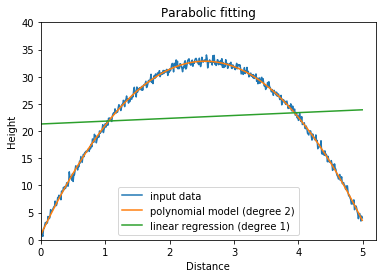

In [19]:
# plot the input data and the estimated models

import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot( x , y , label="input data")
plt.plot( x, (g/2)*x**2 + v*x + h, label = "polynomial model (degree 2)" )
plt.plot( x, x*slope + intercept, label = "linear regression (degree 1)")
plt.axis([0, 5.2 , 0, 40])
plt.xlabel('Distance')
plt.ylabel('Height')
plt.title('Parabolic fitting')
plt.legend( )
plt.show()